In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv'
titanic = pd.read_csv(url)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
used_df = pd.read_csv(url, usecols= ["survived", "pclass", "sex", "age", "fare"])
used_df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [ ]:
used_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [ ]:
used_df.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [ ]:
used_df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

In [ ]:
used_df['age'].median()

28.0

Replacing 'NaN' (i.e. null cells) in 'age' column with the median value and using record 888 to check if executed correctly :

In [ ]:
used_df['age'] = used_df['age'].fillna((used_df['age'].median()))
used_df

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,28.0,23.4500
889,1,1,male,26.0,30.0000


**EDA**<br> Output shows missing data in the following features :<br> **age** : 891 - 714 = 177 (19.9%)<br> **embarked** : 891 - 889 = 2 (2.2e-3%)<br> **deck** : 891 - 203 = 688 (77.2%)<br> **embark_town** : 891 - 889 = 2 (2.2e-3%)<br> With 77.2% and 19.9% missing data in some columns, cleaning this dataset by removing all records with missing data would impact the information within significantly. Also in this instance, the author's choice of columns needed for analysis - survival, class, sex, and fare - have no missing values. However the "age" column has missing data (i.e. NaN), hence the 'age' column was cleaned by replacing NaN with the median value.

**Questions** :<br> 1. "What is the age distribution of non-survivors?"<br>  2. "To what extent did class and sex affect survival?" <br> 3. "Can money buy life - to what extent did fare price affect survival?"

Creating new dataframe of non-survivors :

In [ ]:
Did_Not_Survive = used_df[used_df['survived'] == False]
Did_Not_Survive

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
4,0,3,male,35.0,8.0500
5,0,3,male,28.0,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
...,...,...,...,...,...
884,0,3,male,25.0,7.0500
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
888,0,3,female,28.0,23.4500


Renaming variable :

In [ ]:
dns = Did_Not_Survive
dns

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
4,0,3,male,35.0,8.0500
5,0,3,male,28.0,8.4583
6,0,1,male,54.0,51.8625
7,0,3,male,2.0,21.0750
...,...,...,...,...,...
884,0,3,male,25.0,7.0500
885,0,3,female,39.0,29.1250
886,0,2,male,27.0,13.0000
888,0,3,female,28.0,23.4500


In [ ]:
dns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  549 non-null    int64  
 1   pclass    549 non-null    int64  
 2   sex       549 non-null    object 
 3   age       549 non-null    float64
 4   fare      549 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 25.7+ KB


In [ ]:
Q1_and_Q2_table = dns.groupby(['sex','pclass', 'survived'])['survived'].aggregate('count').unstack()
Q1_and_Q2_table

survived         0
sex    pclass     
female 1         3
       2         6
       3        72
male   1        77
       2        91
       3       300

Questions 1 : What is the age distribution of non-survivors?

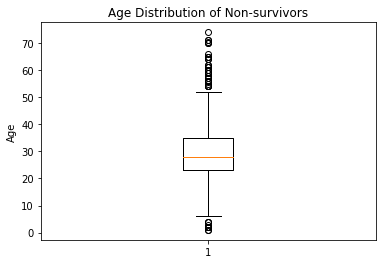

In [ ]:
plt.boxplot(dns['age'])
plt.title('Age Distribution of Non-survivors')
plt.ylabel('Age')
plt.show()

In [ ]:
dns['age'].describe()

count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: age, dtype: float64

In [ ]:
dns['age'].median()

28.0

Questions 2 : To what extent did class and sex affect survival?

In [ ]:
Q2_table = used_df.groupby(['sex','pclass', 'survived'])['survived'].aggregate('count').unstack()
Q2_table

survived         0   1
sex    pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

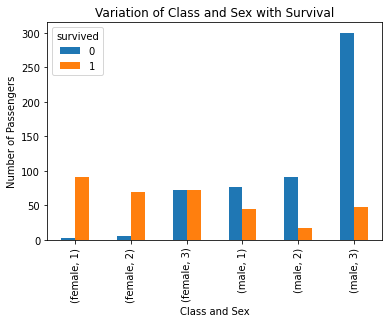

In [ ]:
Q2_table.plot(kind="bar", stacked=False, 
           title="Variation of Class and Sex with Survival",
           xlabel="Class and Sex",
           ylabel="Number of Passengers")

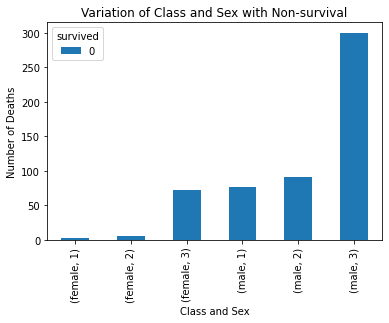

In [ ]:
Q1_and_Q2_table.plot(kind="bar", # stacked=False, 
           title="Variation of Class and Sex with Non-survival",
           xlabel="Class and Sex",
           ylabel="Number of Deaths")

In [ ]:
dns.describe()

,survived,pclass,age,fare
count,549.0,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.028233,22.117887
std,0.0,0.735805,12.499986,31.388207
min,0.0,1.000000,1.000000,0.000000
25%,0.0,2.000000,23.000000,7.854200
50%,0.0,3.000000,28.000000,10.500000
75%,0.0,3.000000,35.000000,26.000000
max,0.0,3.000000,74.000000,263.000000


Question 3 : Can money buy life - to what extent did fare price affect survival?

In [ ]:
Q3_table = dns.groupby(['fare', 'survived'])['survived'].aggregate('count')
Q3_table

fare      survived
0.0000    0           14
4.0125    0            1
5.0000    0            1
6.2375    0            1
6.4375    0            1
                      ..
211.5000  0            1
221.7792  0            1
227.5250  0            1
247.5208  0            1
263.0000  0            2
Name: survived, Length: 177, dtype: int64

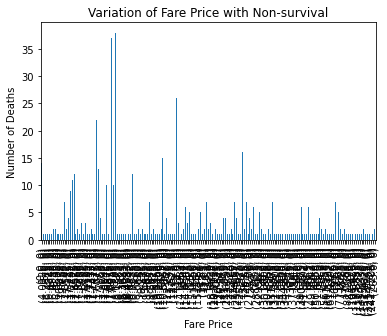

In [ ]:
Q3_table.plot(kind="bar",  
           title="Variation of Fare Price with Non-survival",
           xlabel="Fare Price",
           ylabel="Number of Deaths")

In [ ]:
Q3_table.describe()

count    177.000000
mean       3.101695
std        5.219157
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       38.000000
Name: survived, dtype: float64

In [ ]:
max = used_df.groupby(['pclass'])['fare'].max()
no_zeros = used_df[used_df['fare'] != 0]
min = no_zeros.groupby(['pclass'])['fare'].min()
print(max)
min

pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64


pclass
1     5.0000
2    10.5000
3     4.0125
Name: fare, dtype: float64

In [ ]:
Q3b_table = used_df.groupby(['survived', 'pclass'])['fare'].mean().reset_index()
print(Q3b_table)
Q3b_table_pivot = Q3b_table.pivot(index='pclass', columns='survived', values='fare')
Q3b_table_pivot

   survived  pclass       fare
0         0       1  64.684008
1         0       2  19.412328
2         0       3  13.669364
3         1       1  95.608029
4         1       2  22.055700
5         1       3  13.694887


survived,0,1
pclass,,
1,64.684008,95.608029
2,19.412328,22.055700
3,13.669364,13.694887


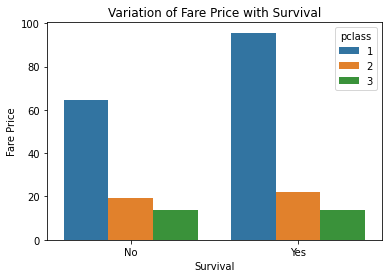

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=Q3b_table, x='survived', y='fare', hue='pclass')
plt.xlabel('Survival')
plt.ylabel('Fare Price')
ax.set_xticklabels(['No', 'Yes'])
plt.title('Variation of Fare Price with Survival')
plt.show()

In [ ]:
max = dns.groupby(['pclass'])['fare'].max()
no_zeros = dns[dns['fare'] != 0]
min = no_zeros.groupby(['pclass'])['fare'].min()
print(max)
min

pclass
1    263.00
2     73.50
3     69.55
Name: fare, dtype: float64


pclass
1     5.0000
2    10.5000
3     4.0125
Name: fare, dtype: float64

In [ ]:
Q3c_table = dns.groupby(['survived', 'pclass'])['fare'].mean().reset_index()
print(Q3c_table)
Q3c_table_pivot = Q3c_table.pivot(index='pclass', columns='survived', values='fare')
Q3c_table_pivot

   survived  pclass       fare
0         0       1  64.684008
1         0       2  19.412328
2         0       3  13.669364


survived,0
pclass,
1,64.684008
2,19.412328
3,13.669364


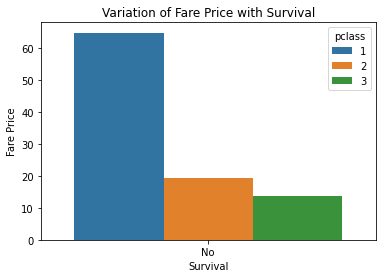

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=Q3c_table, x='survived', y='fare', hue='pclass')
plt.xlabel('Survival')
plt.ylabel('Fare Price')
ax.set_xticklabels(['No', 'Yes'])
plt.title('Variation of Fare Price with Survival')
plt.show()

**Observation** : From the analysis, the age distribution of non-survivors was observed to form a Gaussian curve with both mean and median at 28, and interquatile range of 23 to 35 = 12. This distribution is however likely to be co-dependent on second class male and female passengers, more so on third class male and female, but especially so on third class male passengers. The higher the integer value of the class, the lower the chance of survival. This was largely due to the ship's evacuation policy of "children and women first", which in the author's opinion, is a noble policy even today.

In tandem to this was also an ignoble policy - that of class. From the analysis (Figure 2 and Table 2) it was observed that non-survival correlated highly with class integer number, and starkly so with regard to males.

Analysis also determined that variation of fare price with survival rates was significant - the higher the fare price paid, the better one's chances of survival on the Titanic. This was also likely to be tied to class. By far the major contributory factor to non-survival was class in both sexes, but particularly pronounced in males.

**Conclusions**<br>
From a reduced dataset of 891 passengers (original Titanic dataset has 2224 passengers), survival rates on the Titanic were seen to be impacted significantly by age, class, and sex. Fare price was observed to be directly related to survival rate generally. Hints of bivariate and multivariate relationships with class were not investigated in this task.